<a href="https://colab.research.google.com/github/maksim267/User_Churn_Prediction.jpynb/blob/main/%D0%A2%D0%B5%D0%BB%D0%B5%D1%84%D0%BE%D0%BD%D0%BD%D0%B0%D1%8F_%D1%81%D0%BB%D1%83%D0%B6%D0%B1%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Часть 1. Анализ и предобработка данных

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 142MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 107MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 49.2MB/s]


In [ ]:
data = pd.read_csv('./train.csv')

In [ ]:
data

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


In [ ]:

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'
y=data[target_col]

In [ ]:
data.sample(10)#смотрим на случайные строчки

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
5187,44,109.80,4860.35,Female,1,No,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),0
931,64,24.40,1548.65,Male,1,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),0
662,23,20.40,478.75,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),0
1911,12,56.30,628.65,Male,0,Yes,Yes,Yes,No,DSL,No,No,No,No,Yes,No,Month-to-month,Yes,Mailed check,0
3508,72,110.90,8240.85,Male,0,Yes,No,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0
3384,23,99.95,2292.75,Male,0,No,No,Yes,No,Fiber optic,Yes,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),0
3810,62,39.00,2337.45,Male,0,Yes,No,No,No phone service,DSL,No,No,No,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4778,37,92.50,3473.4,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
2884,31,65.25,1994.3,Female,0,No,No,Yes,Yes,DSL,Yes,No,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),1
5138,4,19.55,68.8,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0


In [ ]:
data.isna().sum(axis=0)#в датасете нету nan

,0
ClientPeriod,0
MonthlySpending,0
TotalSpent,0
Sex,0
IsSeniorCitizen,0
HasPartner,0
HasChild,0
HasPhoneService,0
HasMultiplePhoneNumbers,0
HasInternetService,0


## Анализ данных


In [ ]:
data.dtypes

,0
ClientPeriod,int64
MonthlySpending,float64
TotalSpent,object
Sex,object
IsSeniorCitizen,int64
HasPartner,object
HasChild,object
HasPhoneService,object
HasMultiplePhoneNumbers,object
HasInternetService,object


In [ ]:
data['TotalSpent'].value_counts()#столбец "TotalSpend" имеет пропущенные значения помеченные " " изза чего его тип object а не float64

,count
TotalSpent,
,9
20.2,9
19.75,8
20.05,6
19.65,6
...,...
41.85,1
4326.25,1
950.2,1


In [ ]:
#заменим " " на нули
data.loc[data['TotalSpent']==' ', 'TotalSpent']=0
data['TotalSpent'] = data['TotalSpent'].astype(float)
data.dtypes


,0
ClientPeriod,int64
MonthlySpending,float64
TotalSpent,float64
Sex,object
IsSeniorCitizen,int64
HasPartner,object
HasChild,object
HasPhoneService,object
HasMultiplePhoneNumbers,object
HasInternetService,object


array([[<Axes: title={'center': 'ClientPeriod'}>,
        <Axes: title={'center': 'MonthlySpending'}>],
       [<Axes: title={'center': 'TotalSpent'}>, <Axes: >]], dtype=object)

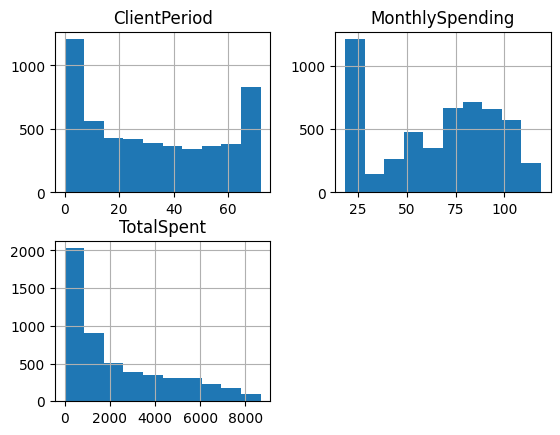

In [ ]:
data[num_cols].hist()

In [ ]:
data['Churn'].value_counts()#классы несбалансированны не критично(1:3)

,count
Churn,
0,3898
1,1384


In [ ]:
for i in cat_cols:
  print(data[i].value_counts())

Sex
Male      2655
Female    2627
Name: count, dtype: int64
IsSeniorCitizen
0    4440
1     842
Name: count, dtype: int64
HasPartner
No     2705
Yes    2577
Name: count, dtype: int64
HasChild
No     3676
Yes    1606
Name: count, dtype: int64
HasPhoneService
Yes    4761
No      521
Name: count, dtype: int64
HasMultiplePhoneNumbers
No                  2511
Yes                 2250
No phone service     521
Name: count, dtype: int64
HasInternetService
Fiber optic    2341
DSL            1800
No             1141
Name: count, dtype: int64
HasOnlineSecurityService
No                     2612
Yes                    1529
No internet service    1141
Name: count, dtype: int64
HasOnlineBackup
No                     2332
Yes                    1809
No internet service    1141
Name: count, dtype: int64
HasDeviceProtection
No                     2317
Yes                    1824
No internet service    1141
Name: count, dtype: int64
HasTechSupportAccess
No                     2604
Yes                   

## Преобразование категориальных признаков

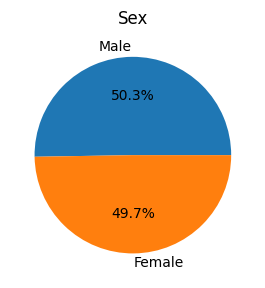

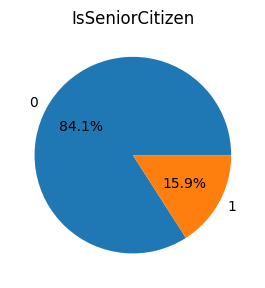

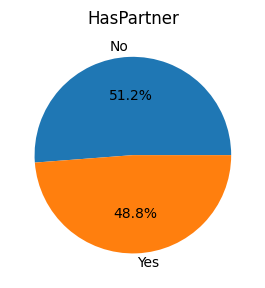

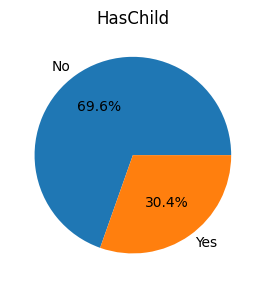

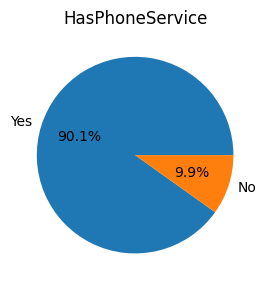

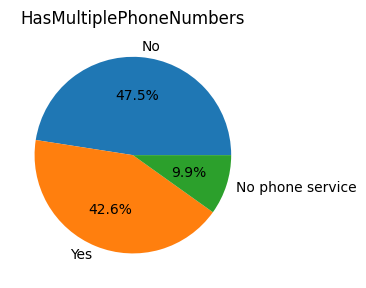

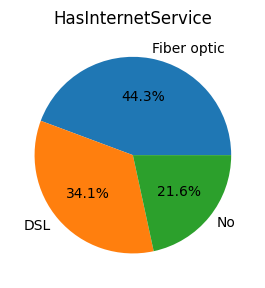

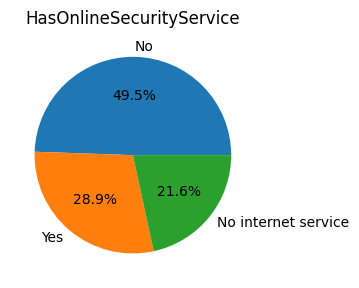

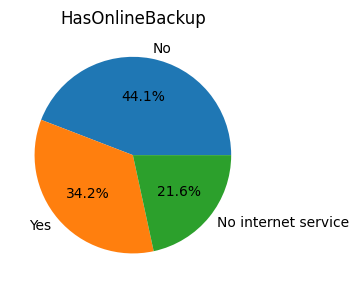

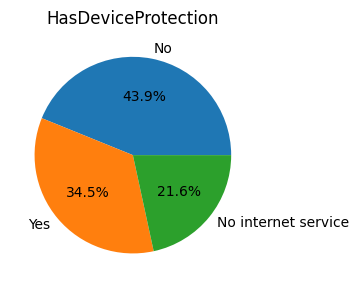

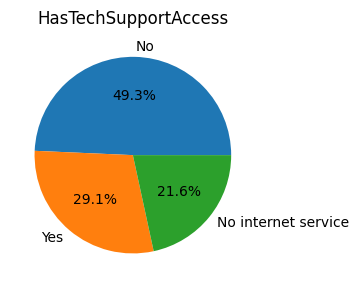

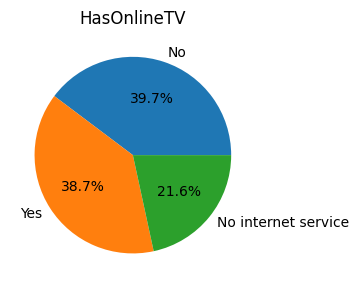

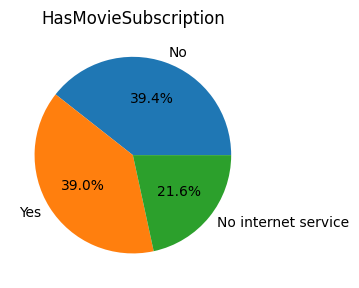

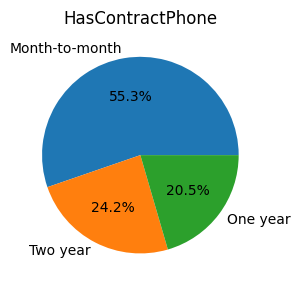

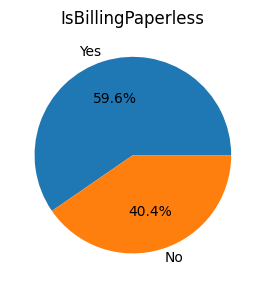

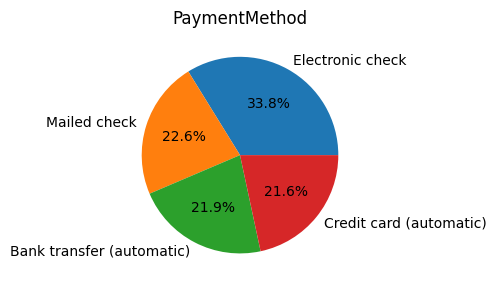

In [ ]:
k=0
# посмотрим на то какие значения принимают категориальные признаки
for col in cat_cols:
  k+=1
  plt.figure(figsize=(30,30))
  val = data[col].value_counts()
  plt.subplot(8, 2, k)
  plt.pie(val.values, labels=val.index, autopct='%1.1f%%')
  plt.title(col)

In [ ]:
'''можноо заметить что почти все признаки имеют по 2-3 значения
 в основном равнымb "No" и "Yes" в следствии чего можно было бы воспользоваться LabelEncoding
 но так как в таком случае значения будут присваюватся в не зависимости от истинной их значимости я провожу ручной LabelEncoding'''
data.loc[data['Sex']=='Male', 'Sex']=1
data.loc[data['Sex']=='Female', 'Sex']=0
data.loc[data['HasPartner']=='Yes', 'HasPartner']=1
data.loc[data['HasPartner']=='No', 'HasPartner']=0
data.loc[data['HasChild']=='Yes', 'HasChild']=1
data.loc[data['HasChild']=='No', 'HasChild']=0
data.loc[data['HasPhoneService']=='Yes', 'HasPhoneService']=1
data.loc[data['HasPhoneService']=='No', 'HasPhoneService']=0
data.loc[data['HasMultiplePhoneNumbers']=='Yes', 'HasMultiplePhoneNumbers']=2
data.loc[data['HasMultiplePhoneNumbers']=='No', 'HasMultiplePhoneNumbers']=1
data.loc[data['HasMultiplePhoneNumbers']=='No phone service', 'HasMultiplePhoneNumbers']=0
data.loc[data['HasInternetService']=='DSL', 'HasInternetService']=1
data.loc[data['HasInternetService']=='Fiber optic', 'HasInternetService']=2
data.loc[data['HasInternetService']=='No', 'HasInternetService']=0
data.loc[data['HasOnlineSecurityService']=='Yes', 'HasOnlineSecurityService']=2
data.loc[data['HasOnlineSecurityService']=='No internet service', 'HasOnlineSecurityService']=0
data.loc[data['HasOnlineSecurityService']=='No', 'HasOnlineSecurityService']=1
data.loc[data['HasOnlineBackup']=='Yes', 'HasOnlineBackup']=2
data.loc[data['HasOnlineBackup']=='No internet service', 'HasOnlineBackup']=0
data.loc[data['HasOnlineBackup']=='No', 'HasOnlineBackup']=1
data.loc[data['HasDeviceProtection']=='Yes', 'HasDeviceProtection']=2
data.loc[data['HasDeviceProtection']=='No internet service', 'HasDeviceProtection']=0
data.loc[data['HasDeviceProtection']=='No', 'HasDeviceProtection']=1
data.loc[data['HasTechSupportAccess']=='Yes', 'HasTechSupportAccess']=2
data.loc[data['HasTechSupportAccess']=='No internet service', 'HasTechSupportAccess']=0
data.loc[data['HasTechSupportAccess']=='No', 'HasTechSupportAccess']=1
data.loc[data['HasOnlineTV']=='Yes', 'HasOnlineTV']=2
data.loc[data['HasOnlineTV']=='No internet service', 'HasOnlineTV']=0
data.loc[data['HasOnlineTV']=='No', 'HasOnlineTV']=1
data.loc[data['HasMovieSubscription']=='Yes', 'HasMovieSubscription']=2
data.loc[data['HasMovieSubscription']=='No internet service', 'HasMovieSubscription']=0
data.loc[data['HasMovieSubscription']=='No', 'HasMovieSubscription']=1
data.loc[data['HasContractPhone']=='One year', 'HasContractPhone']=1
data.loc[data['HasContractPhone']=='Two year', 'HasContractPhone']=2
data.loc[data['HasContractPhone']=='Month-to-month', 'HasContractPhone']=0
data.loc[data['IsBillingPaperless']=='Yes', 'IsBillingPaperless']=1
data.loc[data['IsBillingPaperless']=='No', 'IsBillingPaperless']=0
data[['Sex','HasPartner','HasChild','HasPhoneService','HasMultiplePhoneNumbers','HasInternetService','HasOnlineSecurityService','HasOnlineBackup','HasDeviceProtection','HasTechSupportAccess','HasOnlineTV','HasMovieSubscription','HasContractPhone','IsBillingPaperless']]=data[['Sex','HasPartner','HasChild','HasPhoneService','HasMultiplePhoneNumbers','HasInternetService','HasOnlineSecurityService','HasOnlineBackup','HasDeviceProtection','HasTechSupportAccess','HasOnlineTV','HasMovieSubscription','HasContractPhone','IsBillingPaperless']].astype(int)

In [ ]:
#посмотрим влияние на значения целевой переменной значения некоторых признаков

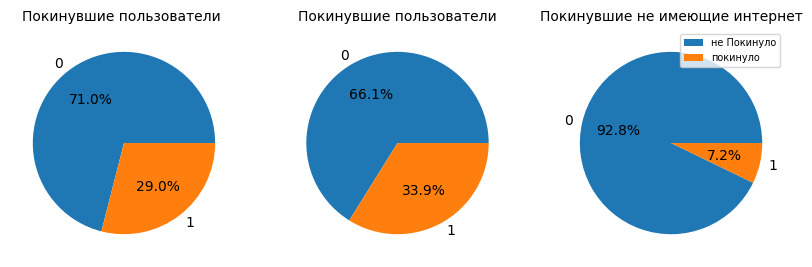

In [ ]:
data_1 = data[data['HasMovieSubscription']== 2]['Churn'].value_counts()
data_2 = data[data['HasMovieSubscription']== 1]['Churn'].value_counts()
data_3 = data[data['HasMovieSubscription']== 0]['Churn'].value_counts()

fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(10, 8))

ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax3.pie(data_3.values, labels=data_3.index, autopct='%1.1f%%', textprops={'fontsize': 10})

ax1.set_title('Покинувшие пользователи ', fontsize=10)
ax2.set_title('Покинувшие пользователи', fontsize=10)
ax3.set_title('Покинувшие не имеющие интернет', fontsize=10)

plt.legend(['не Покинуло','покинуло'], fontsize=7)

plt.show()

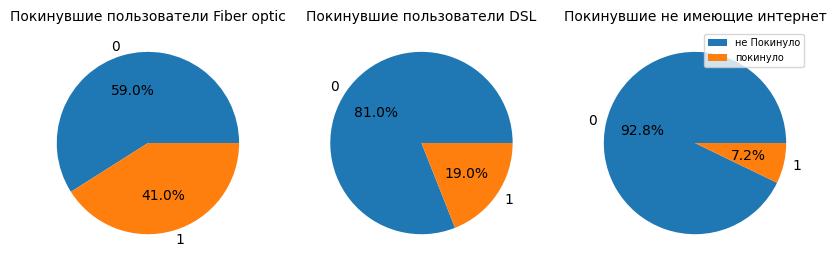

In [ ]:
data_1 = data[data['HasInternetService']== 2]['Churn'].value_counts()
data_2 = data[data['HasInternetService']== 1]['Churn'].value_counts()
data_3 = data[data['HasInternetService']== 0]['Churn'].value_counts()

fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(10, 8))

ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax3.pie(data_3.values, labels=data_3.index, autopct='%1.1f%%', textprops={'fontsize': 10})


ax1.set_title('Покинувшие пользователи Fiber optic', fontsize=10)
ax2.set_title('Покинувшие пользователи DSL', fontsize=10)
ax3.set_title('Покинувшие не имеющие интернет', fontsize=10)

plt.legend(['не Покинуло','покинуло'], fontsize=7)

plt.show()

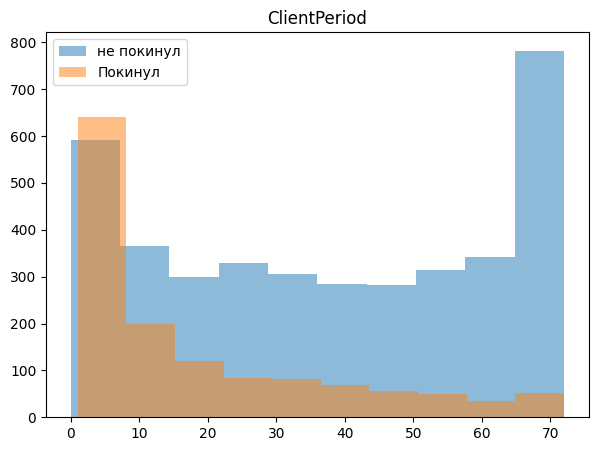

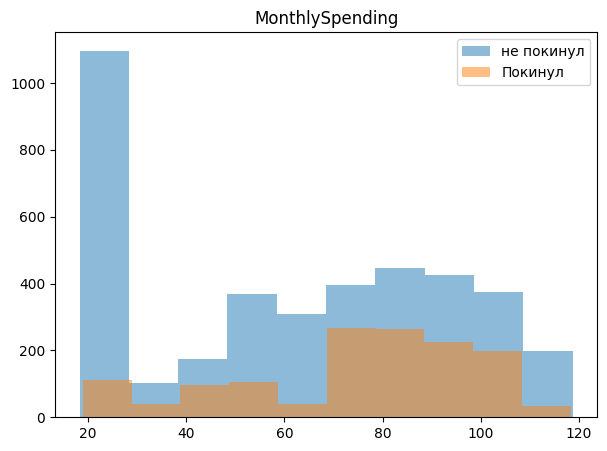

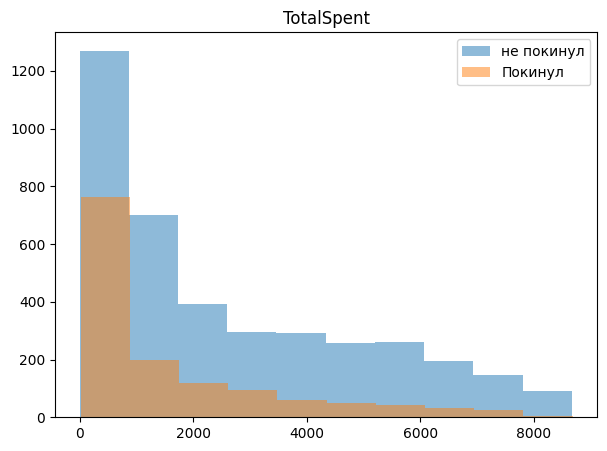

In [ ]:
#проверка влияния популярности на выживание
for i in num_cols:
  plt.figure(figsize=(7, 5))

  plt.hist(data[i][data['Churn'] == 0], alpha=0.5, label='не покинул')
  plt.hist(data[i][data['Churn'] == 1], alpha=0.5, label='Покинул')
  plt.title(i)
  plt.legend()

  plt.show()

In [ ]:
data.dtypes

,0
ClientPeriod,int64
MonthlySpending,float64
TotalSpent,float64
Sex,int64
IsSeniorCitizen,int64
HasPartner,int64
HasChild,int64
HasPhoneService,int64
HasMultiplePhoneNumbers,int64
HasInternetService,int64


In [ ]:
data

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,1,0,1,1,1,1,0,0,0,0,0,0,0,1,0,Mailed check,0
1,72,25.85,1872.20,1,0,1,0,1,2,0,0,0,0,0,0,0,2,0,Credit card (automatic),0
2,1,75.90,75.90,1,0,0,0,1,1,2,1,1,1,2,1,1,0,1,Electronic check,1
3,32,79.30,2570.00,0,1,1,0,1,2,2,1,1,2,1,1,1,0,0,Mailed check,0
4,60,115.25,6758.45,0,0,1,1,1,2,2,2,2,2,2,2,2,2,0,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,1,0,0,0,0,0,1,1,1,1,2,1,1,0,0,Electronic check,0
5278,50,44.45,2188.45,1,0,1,0,0,0,1,2,1,1,2,2,1,1,1,Bank transfer (automatic),0
5279,1,55.05,55.05,1,0,0,0,1,1,1,1,1,2,2,1,1,0,0,Mailed check,0
5280,29,76.00,2215.25,0,0,0,0,1,2,2,1,1,1,1,1,1,0,1,Credit card (automatic),0


In [ ]:

real_columns = np.hstack([np.array(data.columns[data.dtypes=='int64']),np.array(data.columns[data.dtypes=='float64']) ])# выделение вещественных признаков
real_columns=real_columns[real_columns!='Churn']
real_data = data[real_columns]
transformSS = StandardScaler().fit(real_data)
real_dataSS=transformSS.transform(real_data)
# real_dataSS=real_data

cat_columns=data.columns[data.dtypes=='object']# выделение категориальных признаков
cat_data = data[cat_columns]
cat_data
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
one_hot_data = encoder.fit(cat_data)
one_hot_data = pd.DataFrame(one_hot_data.transform(cat_data), index=cat_data.index, columns=encoder.get_feature_names_out())
new_data = pd.concat([pd.DataFrame(real_dataSS, columns=real_columns), one_hot_data], axis='columns')


In [ ]:
new_data

,ClientPeriod,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,...,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,MonthlySpending,TotalSpent,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.920767,0.994713,-0.435476,1.024534,1.512917,0.330803,-0.506627,-1.574344,-1.517954,-1.529382,...,-1.545711,-1.547201,0.371436,-1.214563,-1.505447,-0.555852,0.0,0.0,0.0,1.0
1,1.613288,0.994713,-0.435476,1.024534,-0.660975,0.330803,1.041091,-1.574344,-1.517954,-1.529382,...,-1.545711,-1.547201,1.567733,-1.214563,-1.294998,-0.183039,0.0,1.0,0.0,0.0
2,-1.279005,0.994713,-0.435476,-0.976053,-0.660975,0.330803,-0.506627,0.991433,-0.103874,-0.171702,...,-0.225244,-0.229298,-0.824861,0.823341,0.363737,-0.974768,0.0,0.0,1.0,0.0
3,-0.016173,-1.005315,2.296336,1.024534,-0.660975,0.330803,1.041091,0.991433,-0.103874,-0.171702,...,-0.225244,-0.229298,-0.824861,-1.214563,0.476418,0.124519,0.0,0.0,0.0,1.0
4,1.124450,-1.005315,-0.435476,1.024534,1.512917,0.330803,1.041091,0.991433,1.310206,1.185978,...,1.095222,1.088605,1.567733,-1.214563,1.667856,1.970599,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,-1.197532,0.994713,-0.435476,-0.976053,-0.660975,-3.022945,-2.054345,-0.291455,-0.103874,-0.171702,...,-0.225244,-0.229298,-0.824861,-1.214563,-1.144204,-0.972013,0.0,0.0,1.0,0.0
5278,0.717084,0.994713,-0.435476,1.024534,-0.660975,-3.022945,-2.054345,-0.291455,1.310206,-0.171702,...,1.095222,-0.229298,0.371436,0.823341,-0.678565,-0.043651,1.0,0.0,0.0,0.0
5279,-1.279005,0.994713,-0.435476,-0.976053,-0.660975,0.330803,-0.506627,-0.291455,-0.103874,-0.171702,...,-0.225244,-0.229298,-0.824861,-1.214563,-0.327265,-0.983957,0.0,0.0,0.0,1.0
5280,-0.138382,-1.005315,-0.435476,-0.976053,-0.660975,0.330803,1.041091,0.991433,-0.103874,-0.171702,...,-0.225244,-0.229298,-0.824861,0.823341,0.367051,-0.031838,0.0,1.0,0.0,0.0


In [ ]:
real_data

,ClientPeriod,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,MonthlySpending,TotalSpent
0,55,1,0,1,1,1,1,0,0,0,0,0,0,0,1,0,19.50,1026.35
1,72,1,0,1,0,1,2,0,0,0,0,0,0,0,2,0,25.85,1872.20
2,1,1,0,0,0,1,1,2,1,1,1,2,1,1,0,1,75.90,75.90
3,32,0,1,1,0,1,2,2,1,1,2,1,1,1,0,0,79.30,2570.00
4,60,0,0,1,1,1,2,2,2,2,2,2,2,2,2,0,115.25,6758.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,1,0,0,0,0,0,1,1,1,1,2,1,1,0,0,30.40,82.15
5278,50,1,0,1,0,0,0,1,2,1,1,2,2,1,1,1,44.45,2188.45
5279,1,1,0,0,0,1,1,1,1,1,2,2,1,1,0,0,55.05,55.05
5280,29,0,0,0,0,1,2,2,1,1,1,1,1,1,0,1,76.00,2215.25


## Проверка зависимости между признаками

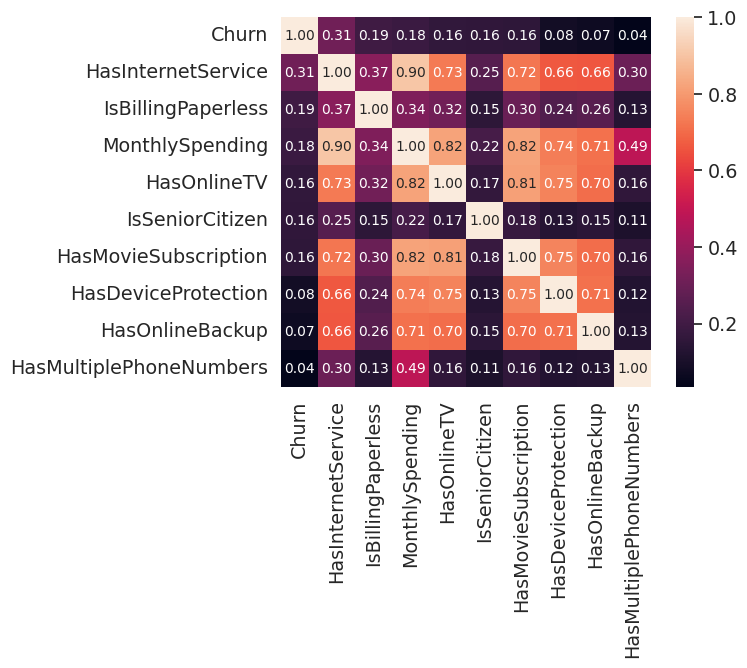

In [ ]:
# проверим зависимость признаков между собой
import seaborn as sns
import numpy as np
corrmat = pd.concat([pd.DataFrame(real_dataSS, columns=real_columns), y], axis='columns').corr()
k = 10
cols = corrmat.nlargest(k, target_col)[target_col].index
cm = np.corrcoef(pd.concat([pd.DataFrame(real_dataSS, columns=real_columns), y], axis='columns')[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
#как видно из матрицы корреляции у нас есть признаки имеющие сильную линейную зависимость, попробуем их устранить
new_data['MonthlySpending_IntrnetService']=new_data['MonthlySpending']*new_data['HasInternetService']
new_data=new_data.drop(['HasMovieSubscription','HasOnlineTV','MonthlySpending','HasInternetService'],axis=1)
#,'HasInternetService'

In [ ]:
new_data

,ClientPeriod,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasContractPhone,IsBillingPaperless,TotalSpent,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MonthlySpending_IntrnetService
0,0.920767,0.994713,-0.435476,1.024534,1.512917,0.330803,-0.506627,-1.517954,-1.529382,-1.530260,-1.518139,0.371436,-1.214563,-0.555852,0.0,0.0,0.0,1.0,2.370090
1,1.613288,0.994713,-0.435476,1.024534,-0.660975,0.330803,1.041091,-1.517954,-1.529382,-1.530260,-1.518139,1.567733,-1.214563,-0.183039,0.0,1.0,0.0,0.0,2.038771
2,-1.279005,0.994713,-0.435476,-0.976053,-0.660975,0.330803,-0.506627,-0.103874,-0.171702,-0.175217,1.306381,-0.824861,0.823341,-0.974768,0.0,0.0,1.0,0.0,0.360621
3,-0.016173,-1.005315,2.296336,1.024534,-0.660975,0.330803,1.041091,-0.103874,-0.171702,1.179827,-0.105879,-0.824861,-1.214563,0.124519,0.0,0.0,0.0,1.0,0.472337
4,1.124450,-1.005315,-0.435476,1.024534,1.512917,0.330803,1.041091,1.310206,1.185978,1.179827,1.306381,1.567733,-1.214563,1.970599,0.0,1.0,0.0,0.0,1.653568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,-1.197532,0.994713,-0.435476,-0.976053,-0.660975,-3.022945,-2.054345,-0.103874,-0.171702,-0.175217,1.306381,-0.824861,-1.214563,-0.972013,0.0,0.0,1.0,0.0,0.333484
5278,0.717084,0.994713,-0.435476,1.024534,-0.660975,-3.022945,-2.054345,1.310206,-0.171702,-0.175217,1.306381,0.371436,0.823341,-0.043651,1.0,0.0,0.0,0.0,0.197771
5279,-1.279005,0.994713,-0.435476,-0.976053,-0.660975,0.330803,-0.506627,-0.103874,-0.171702,1.179827,1.306381,-0.824861,-1.214563,-0.983957,0.0,0.0,0.0,1.0,0.095383
5280,-0.138382,-1.005315,-0.435476,-0.976053,-0.660975,0.330803,1.041091,-0.103874,-0.171702,-0.175217,-0.105879,-0.824861,0.823341,-0.031838,0.0,1.0,0.0,0.0,0.363906


# Часть 2. Обучение моделей

## Применение линейных моделей


In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_data, y, test_size=0.2, random_state=42)

In [ ]:
mod=LogisticRegression(C= 0.1, penalty = 'l2', solver= 'newton-cholesky', tol= 5e-04).fit(X_train,y_train)
predLR=mod.predict(X_test)
roc_auc_score(y_test, predLR)

0.6644794562296248

In [ ]:
predLR=mod.predict(X_train)
roc_auc_score(y_train, predLR)

0.6983037812346541

In [ ]:
modelLR=LogisticRegression()
parameters={
    "penalty" : ['l1','l2','elasticnet'],
    "tol" : np.linspace(5*10**-5,5*10**-4,5),
    "solver" : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    "C" : [100,10,1,0.1,0.01,0.001]#np.linspace(0.5,1.5,20)
}
GS=GridSearchCV(modelLR,parameters,scoring="roc_auc",cv=5,n_jobs=-1)
GS.fit(X_train,y_train)
GS.best_score_

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1500 fits failed out of a total of 2700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_s

0.8400571581745002

In [ ]:
GS.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0005}

In [ ]:
from sklearn.metrics import roc_auc_scorepredLR=GS.predict(X_test)
roc_auc_score(y_test, predLR)

0.666538912643954

In [ ]:
predLR=GS.predict(X_train)
roc_auc_score(y_train, predLR)

0.7115039537756978

## Применение градиентного бустинга


In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(new_data, y, test_size=0.2, random_state=42)

In [ ]:
pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.2 MB/s eta 0:00:00


In [ ]:
#тестирование со стандартными параметрами
from catboost import CatBoostClassifier, Pool
train_dataset = Pool(data=X2_train,
                     label=y2_train,
                     cat_features=[new_data.columns.get_loc(column) for column in cat_columns if column in new_data.columns])
test_dataset = Pool(data=X2_test,
                     label=y_test,
                     cat_features=[new_data.columns.get_loc(column) for column in cat_columns if column in new_data.columns])
modelCBC = CatBoostClassifier()
modelCBC.fit(train_dataset)

Learning rate set to 0.019062
0:	learn: 0.6801100	total: 49ms	remaining: 49s
1:	learn: 0.6675122	total: 55.2ms	remaining: 27.5s
2:	learn: 0.6550178	total: 59.2ms	remaining: 19.7s
3:	learn: 0.6432001	total: 64.2ms	remaining: 16s
4:	learn: 0.6316329	total: 67.1ms	remaining: 13.3s
5:	learn: 0.6216810	total: 69.1ms	remaining: 11.5s
6:	learn: 0.6112660	total: 71.4ms	remaining: 10.1s
7:	learn: 0.6012999	total: 74.6ms	remaining: 9.25s
8:	learn: 0.5918753	total: 78.3ms	remaining: 8.62s
9:	learn: 0.5844592	total: 80.4ms	remaining: 7.96s
10:	learn: 0.5764633	total: 86.8ms	remaining: 7.8s
11:	learn: 0.5685189	total: 88.9ms	remaining: 7.32s
12:	learn: 0.5611286	total: 96.6ms	remaining: 7.33s
13:	learn: 0.5538113	total: 99.1ms	remaining: 6.98s
14:	learn: 0.5474632	total: 103ms	remaining: 6.74s
15:	learn: 0.5409063	total: 109ms	remaining: 6.68s
16:	learn: 0.5351726	total: 111ms	remaining: 6.4s
17:	learn: 0.5299939	total: 117ms	remaining: 6.39s
18:	learn: 0.5245377	total: 119ms	remaining: 6.16s
19:	l

In [ ]:
test_y_pred_boosting = modelCBC.predict_proba(X2_test)[:,1]
test_auc =  roc_auc_score(y2_test,test_y_pred_boosting)
test_auc

0.8148128480527516

In [ ]:
train_dataset = Pool(data=X2_train,
                     label=y2_train,
                     cat_features=[new_data.columns.get_loc(column) for column in cat_columns if column in new_data.columns])
test_dataset = Pool(data=X2_test,
                     label=y_test,
                     cat_features=[new_data.columns.get_loc(column) for column in cat_columns if column in new_data.columns])
modelCBC = CatBoostClassifier(eval_metric='AUC', iterations=1000,custom_loss='AUC',use_best_model=True,learning_rate=0.01)
modelCBC.fit(train_dataset, eval_set=(test_dataset))

0:	test: 0.7733213	best: 0.7733213 (0)	total: 3.11ms	remaining: 3.1s
1:	test: 0.8036705	best: 0.8036705 (1)	total: 6.22ms	remaining: 3.1s
2:	test: 0.8128457	best: 0.8128457 (2)	total: 8.54ms	remaining: 2.84s
3:	test: 0.8132498	best: 0.8132498 (3)	total: 11ms	remaining: 2.73s
4:	test: 0.8149606	best: 0.8149606 (4)	total: 13.3ms	remaining: 2.65s
5:	test: 0.8140394	best: 0.8149606 (4)	total: 15.6ms	remaining: 2.59s
6:	test: 0.8122870	best: 0.8149606 (4)	total: 17.9ms	remaining: 2.54s
7:	test: 0.8117698	best: 0.8149606 (4)	total: 20.2ms	remaining: 2.5s
8:	test: 0.8116590	best: 0.8149606 (4)	total: 22.5ms	remaining: 2.48s
9:	test: 0.8115782	best: 0.8149606 (4)	total: 24.7ms	remaining: 2.45s
10:	test: 0.8113289	best: 0.8149606 (4)	total: 26.9ms	remaining: 2.42s
11:	test: 0.8114766	best: 0.8149606 (4)	total: 28.8ms	remaining: 2.37s
12:	test: 0.8110472	best: 0.8149606 (4)	total: 30.5ms	remaining: 2.31s
13:	test: 0.8109687	best: 0.8149606 (4)	total: 32.7ms	remaining: 2.3s
14:	test: 0.8120007	be

In [ ]:
train_y_pred_boosting = modelCBC.predict_proba(X2_train)[:,1]
train_auc = roc_auc_score(y2_train,train_y_pred_boosting)
train_auc

0.8916461377997655

In [ ]:
test_y_pred_boosting = modelCBC.predict_proba(X2_test)[:,1]
test_auc =  roc_auc_score(y2_test,test_y_pred_boosting)
test_auc

0.8292128812995816

Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

In [ ]:
from catboost import CatBoostClassifier, Pool
train_dataset2 = Pool(data=new_data,
                     label=data['Churn'],
                     cat_features=[new_data.columns.get_loc(column) for column in cat_columns if column in new_data.columns])
modelCBCall = CatBoostClassifier(eval_metric='AUC', iterations=1000,custom_loss='AUC',learning_rate=0.01)
modelCBCall.fit(train_dataset2)

0:	total: 2.56ms	remaining: 2.55s
1:	total: 5.34ms	remaining: 2.66s
2:	total: 7.72ms	remaining: 2.56s
3:	total: 10.1ms	remaining: 2.52s
4:	total: 12.4ms	remaining: 2.48s
5:	total: 14.8ms	remaining: 2.45s
6:	total: 17.1ms	remaining: 2.42s
7:	total: 19.6ms	remaining: 2.43s
8:	total: 22.1ms	remaining: 2.43s
9:	total: 24.4ms	remaining: 2.42s
10:	total: 26.8ms	remaining: 2.4s
11:	total: 28.7ms	remaining: 2.36s
12:	total: 30.5ms	remaining: 2.31s
13:	total: 33.2ms	remaining: 2.34s
14:	total: 35.7ms	remaining: 2.34s
15:	total: 38ms	remaining: 2.33s
16:	total: 40.3ms	remaining: 2.33s
17:	total: 42.6ms	remaining: 2.32s
18:	total: 44.9ms	remaining: 2.32s
19:	total: 47.2ms	remaining: 2.31s
20:	total: 49.6ms	remaining: 2.31s
21:	total: 53ms	remaining: 2.35s
22:	total: 55.4ms	remaining: 2.35s
23:	total: 57.7ms	remaining: 2.35s
24:	total: 60.1ms	remaining: 2.34s
25:	total: 62.4ms	remaining: 2.34s
26:	total: 64.8ms	remaining: 2.33s
27:	total: 67.1ms	remaining: 2.33s
28:	total: 69.5ms	remaining: 2.33s


ВАШ ОТВЕТ

# Часть 3. Предсказания

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

X_test.loc[X_test['TotalSpent']==' ', 'TotalSpent']=0
X_test['TotalSpent'] = X_test['TotalSpent'].astype(float)

X_test.loc[X_test['Sex']=='Male', 'Sex']=1
X_test.loc[X_test['Sex']=='Female', 'Sex']=0
X_test.loc[X_test['HasPartner']=='Yes', 'HasPartner']=1
X_test.loc[X_test['HasPartner']=='No', 'HasPartner']=0
X_test.loc[X_test['HasChild']=='Yes', 'HasChild']=1
X_test.loc[X_test['HasChild']=='No', 'HasChild']=0
X_test.loc[X_test['HasPhoneService']=='Yes', 'HasPhoneService']=1
X_test.loc[X_test['HasPhoneService']=='No', 'HasPhoneService']=0
X_test.loc[X_test['HasMultiplePhoneNumbers']=='Yes', 'HasMultiplePhoneNumbers']=2
X_test.loc[X_test['HasMultiplePhoneNumbers']=='No', 'HasMultiplePhoneNumbers']=1
X_test.loc[X_test['HasMultiplePhoneNumbers']=='No phone service', 'HasMultiplePhoneNumbers']=0
X_test.loc[X_test['HasInternetService']=='DSL', 'HasInternetService']=1
X_test.loc[X_test['HasInternetService']=='Fiber optic', 'HasInternetService']=2
X_test.loc[X_test['HasInternetService']=='No', 'HasInternetService']=0
X_test.loc[X_test['HasOnlineSecurityService']=='Yes', 'HasOnlineSecurityService']=2
X_test.loc[X_test['HasOnlineSecurityService']=='No internet service', 'HasOnlineSecurityService']=0
X_test.loc[X_test['HasOnlineSecurityService']=='No', 'HasOnlineSecurityService']=1
X_test.loc[X_test['HasOnlineBackup']=='Yes', 'HasOnlineBackup']=2
X_test.loc[X_test['HasOnlineBackup']=='No internet service', 'HasOnlineBackup']=0
X_test.loc[X_test['HasOnlineBackup']=='No', 'HasOnlineBackup']=1
X_test.loc[X_test['HasDeviceProtection']=='Yes', 'HasDeviceProtection']=2
X_test.loc[X_test['HasDeviceProtection']=='No internet service', 'HasDeviceProtection']=0
X_test.loc[X_test['HasDeviceProtection']=='No', 'HasDeviceProtection']=1
X_test.loc[X_test['HasTechSupportAccess']=='Yes', 'HasTechSupportAccess']=2
X_test.loc[X_test['HasTechSupportAccess']=='No internet service', 'HasTechSupportAccess']=0
X_test.loc[X_test['HasTechSupportAccess']=='No', 'HasTechSupportAccess']=1
X_test.loc[X_test['HasOnlineTV']=='Yes', 'HasOnlineTV']=2
X_test.loc[X_test['HasOnlineTV']=='No internet service', 'HasOnlineTV']=0
X_test.loc[X_test['HasOnlineTV']=='No', 'HasOnlineTV']=1
X_test.loc[X_test['HasMovieSubscription']=='Yes', 'HasMovieSubscription']=2
X_test.loc[X_test['HasMovieSubscription']=='No internet service', 'HasMovieSubscription']=0
X_test.loc[X_test['HasMovieSubscription']=='No', 'HasMovieSubscription']=1
X_test.loc[X_test['HasContractPhone']=='One year', 'HasContractPhone']=1
X_test.loc[X_test['HasContractPhone']=='Two year', 'HasContractPhone']=2
X_test.loc[X_test['HasContractPhone']=='Month-to-month', 'HasContractPhone']=0
X_test.loc[X_test['IsBillingPaperless']=='Yes', 'IsBillingPaperless']=1
X_test.loc[X_test['IsBillingPaperless']=='No', 'IsBillingPaperless']=0
X_test[['Sex','HasPartner','HasChild','HasPhoneService','HasMultiplePhoneNumbers','HasInternetService','HasOnlineSecurityService','HasOnlineBackup','HasDeviceProtection','HasTechSupportAccess','HasOnlineTV','HasMovieSubscription','HasContractPhone','IsBillingPaperless']]=X_test[['Sex','HasPartner','HasChild','HasPhoneService','HasMultiplePhoneNumbers','HasInternetService','HasOnlineSecurityService','HasOnlineBackup','HasDeviceProtection','HasTechSupportAccess','HasOnlineTV','HasMovieSubscription','HasContractPhone','IsBillingPaperless']].astype(int)

real_columns = np.hstack([np.array(X_test.columns[X_test.dtypes=='int64']),np.array(X_test.columns[X_test.dtypes=='float64']) ])# выделение вещественных признаков
real_data = X_test[real_columns]
transformSS = StandardScaler().fit(real_data)
real_dataSS=transformSS.transform(real_data)
real_dataSS=real_data

cat_columns=X_test.columns[X_test.dtypes=='object']# выделение категориальных признаков
cat_data = X_test[cat_columns]
cat_data
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
one_hot_data = encoder.fit(cat_data)
one_hot_data = pd.DataFrame(one_hot_data.transform(cat_data), index=cat_data.index, columns=encoder.get_feature_names_out())
new_data2 = pd.concat([pd.DataFrame(real_dataSS, columns=real_columns), one_hot_data], axis='columns')

new_data2['MonthlySpending_IntrnetService']=new_data2['MonthlySpending']*new_data2['HasInternetService']
new_data2=new_data2.drop(['HasMovieSubscription','HasOnlineTV','MonthlySpending','HasInternetService'],axis=1)

# new_data2=new_data2.drop(['HasMovieSubscription','HasOnlineTV'],axis=1)

In [ ]:
submission['Churn'] = modelCBCall.predict_proba(new_data2)[:,1]# используйте best_model.predict_proba(X_test), не забудьте выделить вероятность класса 1.
submission.to_csv('./my_submission.csv', index=False)

In [ ]:
submission

,Id,Churn
0,0,0.036062
1,1,0.220133
2,2,0.287574
3,3,0.026206
4,4,0.062755
...,...,...
1756,1756,0.043275
1757,1757,0.043323
1758,1758,0.295937
1759,1759,0.295937
